In [75]:
import numpy as np
import scipy.stats
import pickle
import time

startTime=time.time()
# Load the saved ARIMA model from the file
with open('mean_Throughput_model.pkl', 'rb') as file:
    mean_loaded_model = pickle.load(file)
with open('std_Throughput_model.pkl', 'rb') as file:
    std_loaded_model = pickle.load(file)



In [84]:
minute=1
fiveSecondFromMinute=minute*12
# Make predictions using the loaded model
prediction_time=int((time.time()-startTime)/5)
print(prediction_time)
mean_pred = mean_loaded_model.predict(prediction_time,prediction_time+fiveSecondFromMinute, typ="levels")
std_dev_pred = std_loaded_model.predict(prediction_time, prediction_time+fiveSecondFromMinute, typ="levels")

# Define threshold and time interval
threshold = 3*1000000


# Calculate cumulative probabilities for each time step within the interval
cumulative_probabilities = []
for mean, std_dev in zip(mean_pred[:], std_dev_pred[:]):
    probability = scipy.stats.norm.cdf(threshold, loc=mean, scale=std_dev)
    cumulative_probabilities.append(probability)

print(cumulative_probabilities)
cumulative_probabilities=1-np.array(cumulative_probabilities)
cumulative_probabilities = cumulative_probabilities[~np.isnan(cumulative_probabilities)]

# Combine probabilities (e.g., take the maximum)
combined_probability =1- np.prod(cumulative_probabilities)
combined_probability_max=np.max(1-cumulative_probabilities)
meanValuePredicted=np.mean(mean_pred)
print(f"Probability of subceeding 1 time '{threshold} MB/s' of throughput in {minute} minute: {combined_probability*100:.6f}%")
print(f"Max instant Probability of subceeding '{threshold} MB/s' of throughput in {minute} minute: {combined_probability_max*100:.6f}%")
print(f"Mean value predicted in {minute} minute: {meanValuePredicted/1000000:.2f} MB/s")

25
[0.14986515248297944, 0.1532737139287289, 0.15883258049390203, 0.16503431879031155, 0.17093830987277797, 0.1767957568564602, 0.183855166037575, 0.19038347560279328, 0.196957047920099, 0.20342050405880574, 0.20970123618637576, 0.2159239403865903, 0.22208999682912706]
Probability of subceeding 1 time '3000000 MB/s' of throughput in 1 minute: 92.969767%
Max instant Probability of subceeding '3000000 MB/s' of throughput in 1 minute: 22.209000%
Mean value predicted in 1 minute: 7.59 MB/s


Text(0, 0.5, 'Througput (MB/s)')

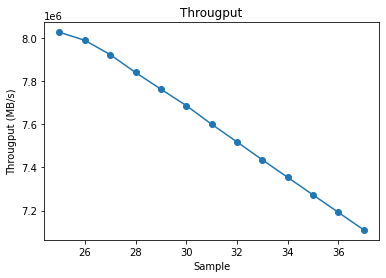

In [85]:
from matplotlib import pyplot as plt


plt.plot(mean_pred, marker='o')
plt.title('Througput')
plt.xlabel('Sample')
plt.ylabel('Througput (MB/s)')